### Import Necessary Feature 🚲

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

### Reading Dataset ⚙️

In [3]:
df = pd.read_csv("customer_credit_loan_train.csv")

df.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status
0,e72a2f0d-1db6-475d-a19b-ef1b4cd41526,1dcd12f3-dcd2-47de-b013-2f83a47c4da3,344036.0,Short Term,738.0,2785590.0,10+ years,Home Mortgage,Debt Consolidation,32962.91,20.2,10.0,1.0,142329.0,184976.0,1.0,0.0,Fully Paid
1,001cc33b-b2b7-4015-860e-b8a264f3c8e8,e7547780-1896-4bf6-933b-103e0a60b8df,111540.0,Short Term,746.0,1708898.0,10+ years,Home Mortgage,Buy House,20221.89,16.9,11.0,0.0,357295.0,510752.0,0.0,0.0,Fully Paid
2,91547ea7-985c-4657-8768-3839c22ea2fa,95580534-3835-482b-838d-19a7332ae943,556952.0,Long Term,671.0,1503128.0,< 1 year,Own Home,Debt Consolidation,15156.68,14.0,4.0,0.0,66367.0,84810.0,0.0,0.0,Fully Paid
3,ca4789c7-8880-467e-b3db-11166bdede4d,8bb4ec48-61f2-4420-b248-88bb03aeefb2,753302.0,Long Term,700.0,1821587.0,7 years,Home Mortgage,Debt Consolidation,16546.15,17.3,12.0,0.0,478648.0,1045726.0,0.0,0.0,Fully Paid
4,8c09e637-df32-4ab6-a16e-1c7ccc0a0d82,0d95ab08-2697-41fa-a43a-1f9cb94bfbc0,754754.0,Long Term,678.0,2029998.0,10+ years,Home Mortgage,Debt Consolidation,37723.93,17.3,21.0,0.0,1115699.0,2028048.0,0.0,0.0,Fully Paid


### Describing Dataset 💪


#### Statistic Description of the DF

In [4]:
# Size of DF

rows, columns = df.shape
print("Banyaknya baris pada dataset: ", rows)
print("Banyaknya kolom pada dataset: ", columns)

Banyaknya baris pada dataset:  85296
Banyaknya kolom pada dataset:  18


In [5]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,8.529600e+04,85296.000000,8.529600e+04,85296.000000,85296.000000,85296.000000,85296.000000,8.529600e+04,8.529600e+04,85296.000000,85296.000000
mean,1.308123e+07,1119.072738,1.377063e+06,18405.787031,18.238954,11.121461,0.165098,2.942867e+05,7.747765e+05,0.115613,0.028598
std,3.331783e+07,1392.969454,9.900590e+05,12155.576841,7.022574,4.991050,0.477663,3.752491e+05,8.970276e+06,0.347745,0.255848
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.802680e+05,715.000000,9.386000e+05,10163.432500,13.500000,8.000000,0.000000,1.129360e+05,2.769745e+05,0.000000,0.000000
50%,3.142260e+05,737.000000,1.378277e+06,16142.590000,17.000000,10.000000,0.000000,2.096650e+05,4.731430e+05,0.000000,0.000000
75%,5.327960e+05,1076.456089,1.496079e+06,23941.377500,21.700000,14.000000,0.000000,3.675170e+05,7.911860e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


#### Correlation of Data

##### Pearson R

<Axes: >

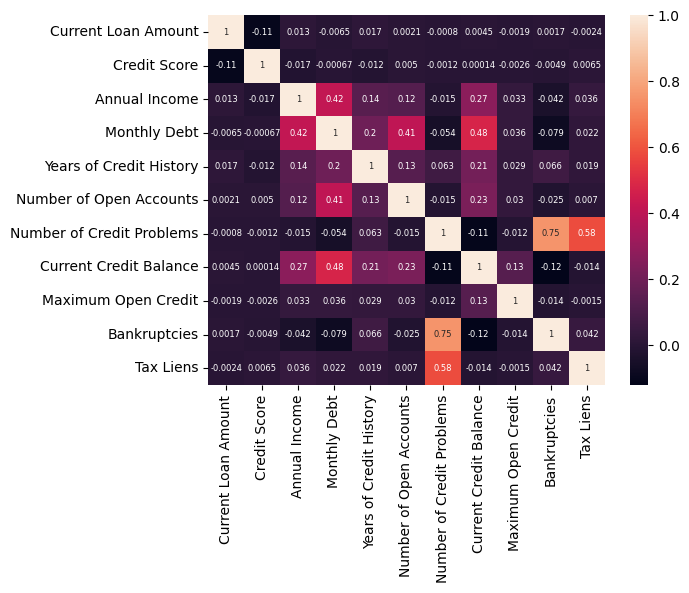

In [6]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot= True, annot_kws={"fontsize":6})

##### Spearman Rho

<Axes: >

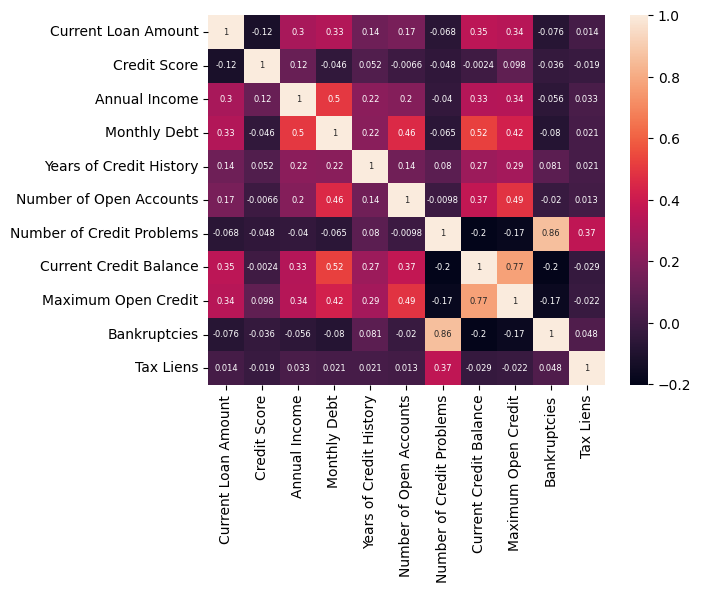

In [7]:
pearson_r = df.corr(method = "spearman")

sns.heatmap(pearson_r, annot= True, annot_kws={"fontsize":6})

### Pertanyaan

##### Pertanyaan 1
Fitur apakah yang berkaitan paling tinggi dengan tingkat skor credit dari antara jumlah peminjaman, pendapatan tahunan, hutang bulanan, dan jumlah saldo kredit saat ini?
- Current Loan Amount (Jumlah peminjaman) = -0.11 or -0.12
- Annual Income (Pendapatan tahunan) = -0.017 or 0.12
- Monthly Debt (Hutang bulanan) = -0.00067 or -0.046
- Current Credit Balance (Jumlah saldo kredit saat ini) = 0.00014 or -0.0024

##### Pertanyaan 2
Apakah tujuan peminjaman dengan persentase terbanyak berdasarkan masing-masing lama
waktu peminjam telah bekerja?

In [43]:
df_home_ownership = df.groupby([df["Years in current job"], df["Purpose"].str.lower()])

counts = df_home_ownership.size().reset_index(name='count')

result = counts.groupby('Years in current job').apply(lambda x: x.loc[x['count'].idxmax()])

result["percentage"] = result['count'] / counts.groupby('Years in current job')['count'].sum() * 100

# Percentage = perbandingan value terbesar dengan SEMUA jumlah pada tahun tersebut.

result

,Years in current job,Purpose,count,percentage
Years in current job,,,,
1 year,1 year,debt consolidation,4319,77.665887
10+ years,10+ years,debt consolidation,24082,80.407346
2 years,2 years,debt consolidation,6039,77.492622
3 years,3 years,debt consolidation,5394,77.112223
4 years,4 years,debt consolidation,3956,75.655001
5 years,5 years,debt consolidation,4540,78.033689
6 years,6 years,debt consolidation,3832,78.605128
7 years,7 years,debt consolidation,3830,80.818738
8 years,8 years,debt consolidation,3142,80.030565


##### Pertanyaan 3
Berapa rata-rata hutang bulanan dari peminjaman dengan berbagai macam jenis kepemilikan rumah?

- HaveMortgage: dari 176 data, mempunyai rata-rata hutang bulanan sebesar 17861.678693
- Home Mortgage: dari 41421 (majoritas), mempunyai rata-rata hutang bulanan sebesar 20978.819016
- Own Home: dari 7773 data, mempunyai rata-rata hutang bulanan sebesar 16999.900579.
- Rent: dari 35926 data, mempunyai rata-rata hutang bulanan sebesar 15746.046472


In [ ]:
df_home_ownership = df.groupby("Home Ownership")
df_home_ownership.describe()["Monthly Debt"]

,count,mean,std,min,25%,50%,75%,max
Home Ownership,,,,,,,,
HaveMortgage,176.0,17861.678693,11650.771545,373.73,8916.3675,15424.58,25825.4175,54230.56
Home Mortgage,41421.0,20978.819016,13228.352979,0.00,12044.1000,18649.26,26986.8400,435843.28
Own Home,7773.0,16999.900579,11856.042580,0.00,8906.0600,14783.33,22142.6000,139480.90
Rent,35926.0,15746.046472,10141.575381,0.00,8756.9100,13970.89,20530.2600,229057.92


##### Pertanyaan 4

Bagaimana distribusi pendapatan peminjam berdasarkan kepemillikan rumah dan jumlah akun yang akan dibuka?

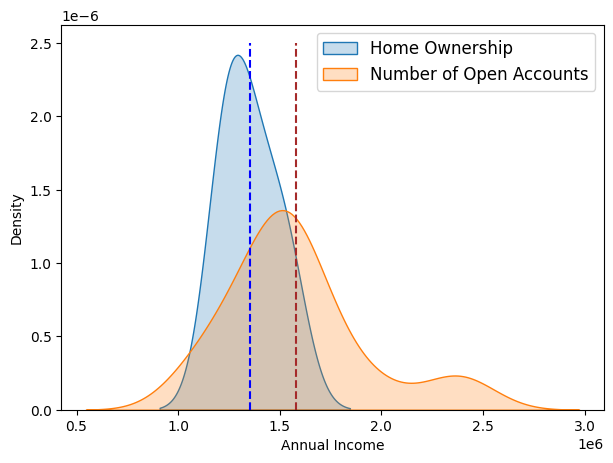

In [ ]:
annual_income_home_ownership = df.groupby(df["Home Ownership"])["Annual Income"].mean()
annual_income_open_accounts = df.groupby(df["Number of Open Accounts"])["Annual Income"].mean()

plt.figure(figsize=(7,5))
sns.kdeplot(annual_income_home_ownership, shade=True)
sns.kdeplot(annual_income_open_accounts, shade=True)
plt.legend(['Home Ownership','Number of Open Accounts'], fontsize=12)
plt.vlines(annual_income_home_ownership.mean(), ymin = 0, ymax = 2.5*1e-6, color='blue', linestyle='--')
plt.vlines(annual_income_open_accounts.mean(), ymin = 0, ymax = 2.5*1e-6, color='brown', linestyle='--')

1531591.198492492


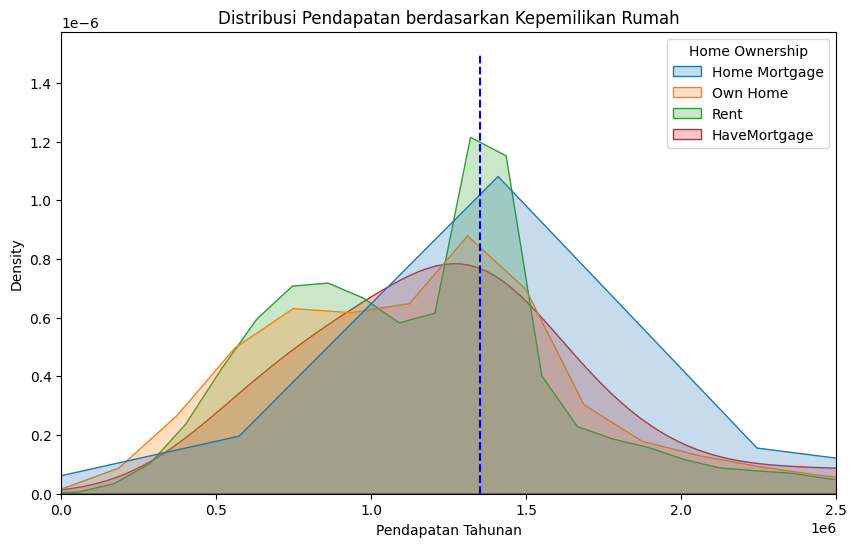

In [ ]:
# Membuat KDE plot untuk distribusi pendapatan berdasarkan kepemilikan rumah
print(annual_income_home_ownership.max())
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="Annual Income", hue="Home Ownership", fill=True, common_norm=False)
plt.xlim(0, 2.5*1e6)
plt.vlines(annual_income_home_ownership.mean(), ymin = 0, ymax = 1.5*1e-6, color='blue', linestyle='--')
plt.title("Distribusi Pendapatan berdasarkan Kepemilikan Rumah")
plt.xlabel("Pendapatan Tahunan")
plt.ylabel("Density")
plt.show()

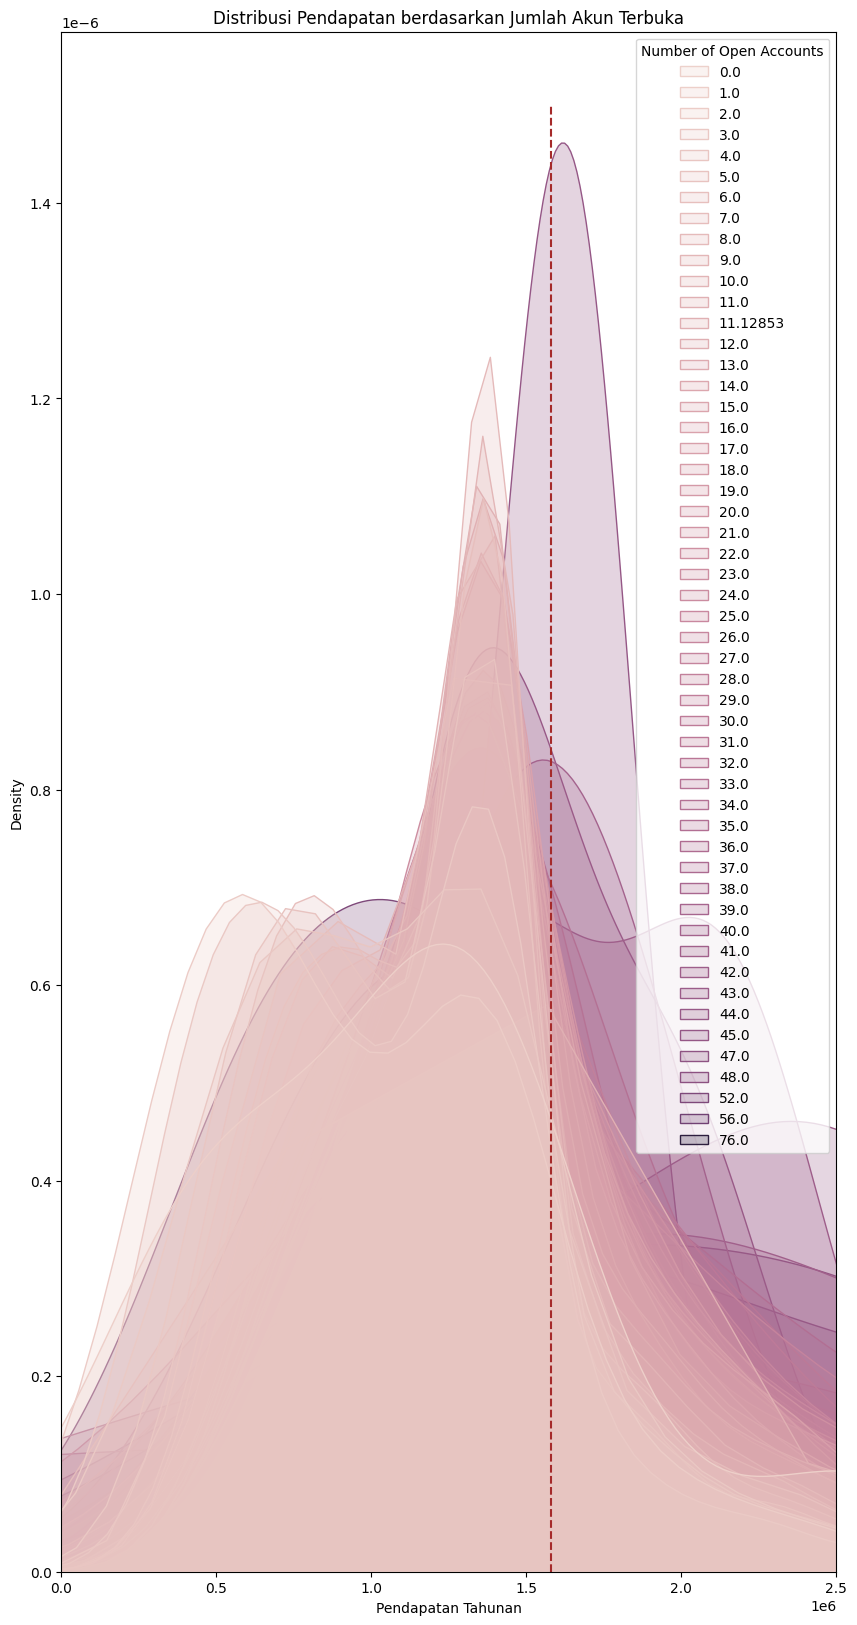

In [ ]:
# Membuat KDE plot untuk distribusi pendapatan berdasarkan jumlah akun terbuka
plt.figure(figsize=(10, 20))
sns.kdeplot(data=df, x="Number of Open Accounts", hue="Number of Open Accounts", fill=True, common_norm=False)
plt.xlim(0, 2.5*1e6)
plt.vlines(annual_income_open_accounts.mean(), ymin = 0, ymax = 1.5*1e-6, color='brown', linestyle='--')
plt.title("Distribusi Pendapatan berdasarkan Jumlah Akun Terbuka")
plt.xlabel("Pendapatan Tahunan")
plt.ylabel("Density")
plt.show()

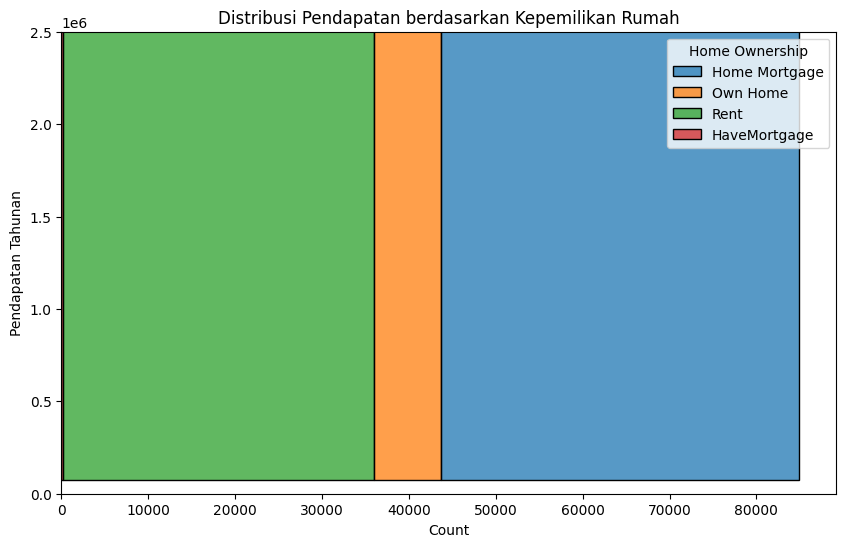

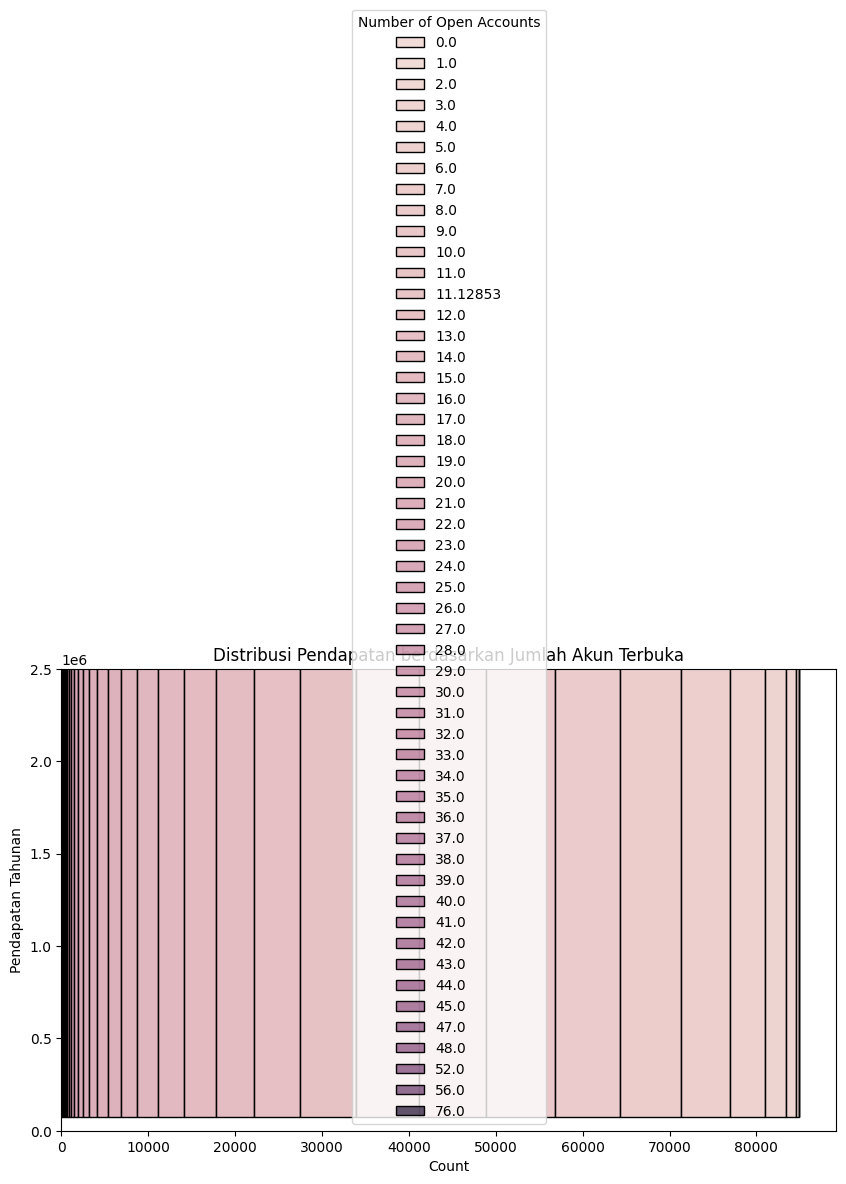

In [ ]:
# Membuat histogram untuk distribusi pendapatan berdasarkan kepemilikan rumah
plt.figure(figsize=(10, 6))
sns.histplot(data=df, y="Annual Income", hue="Home Ownership", multiple="stack", bins=1e6)
plt.ylim(0, 2.5*1e7)
plt.hlines(annual_income_home_ownership.mean(), xmin=0, xmax=120, color='blue', linestyle='--')
plt.title("Distribusi Pendapatan berdasarkan Kepemilikan Rumah")
plt.ylabel("Pendapatan Tahunan")
plt.xlabel("Count")
plt.show()

# Membuat histogram untuk distribusi pendapatan berdasarkan jumlah akun terbuka
plt.figure(figsize=(10, 6))
sns.histplot(data=df, y="Annual Income", hue="Number of Open Accounts", multiple="stack", bins=30)
plt.ylim(0, 2.5*1e7)
plt.hlines(annual_income_open_accounts.mean(), xmin=0, xmax=120, color='brown', linestyle='--')
plt.title("Distribusi Pendapatan berdasarkan Jumlah Akun Terbuka")
plt.ylabel("Pendapatan Tahunan")
plt.xlabel("Count")
plt.show()

### B, Pertanyaan 1

#### Preprocessing Related

In [ ]:
# mengecek nilai null
def check_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na / len(df)
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
    else:
        print(missing_data[missing_data['Total'] > 0])

def preprocess(df):
  check_null(df)

  print("Duplicates value on dataset:", df.duplicated().sum())

preprocess(df)
# May handle outlier here

Tidak ditemukan missing value pada dataset
Duplicates value on dataset: 0


#### Outlier Related

In [ ]:
from typing import Literal

# Label encoding
X = df.drop(["Loan Status", "Loan ID", "Customer ID"], axis=1)

y = df["Loan Status"]
columns_to_encode = [
    "Term",
    # "Home Ownership",
    # "Purpose"
]

columns_to_one_hot_encode = [
    "Home Ownership",
    "Purpose"
]

# X["Years in current job"] = X["Years in current job"].replace("< 1 year", "0 year")
X["Years in current job"] = X["Years in current job"].apply(lambda x: int(''.join(filter(str.isdigit, str(x)))))

def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df < lower_limit) | (df > upper_limit)
    print ("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers

def determine_outlier_thresholds_iqr(dataframe, col_name, th1=0.25, th3=0.75):
    quartile1 = dataframe[col_name].quantile(th1)
    quartile3 = dataframe[col_name].quantile(th3)
    iqr = quartile3 - quartile1
    upper_limit = quartile3 + 1.5 * iqr
    lower_limit = quartile1 - 1.5 * iqr
    return lower_limit, upper_limit

def check_outliers_iqr(dataframe, col_name):
    lower_limit, upper_limit = determine_outlier_thresholds_iqr(dataframe, col_name)
    if dataframe[(dataframe[col_name] > upper_limit) | (dataframe[col_name] < lower_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds_iqr(dataframe, cols, target_value, replace=False):
    from tabulate import tabulate
    data = []
    for col_name in cols:
        if col_name != target_value and (col_name not in columns_to_one_hot_encode) and (col_name not in columns_to_encode):
            outliers_ = check_outliers_iqr(dataframe,col_name)
            count = None
            lower_limit, upper_limit = determine_outlier_thresholds_iqr(dataframe, col_name)
            if outliers_:
                count = dataframe[(dataframe[col_name] > upper_limit) | (dataframe[col_name] < lower_limit)][col_name].count()
                if replace:
                    if lower_limit < 0:
                        # We don't want to replace with negative values, right!
                        dataframe.loc[(dataframe[col_name] > upper_limit), col_name] = upper_limit
                    else:
                        dataframe.loc[(dataframe[col_name] < lower_limit), col_name] = lower_limit
                        dataframe.loc[(dataframe[col_name] > upper_limit), col_name] = upper_limit
            outliers_status = check_outliers_iqr(dataframe, col_name)
            data.append([outliers_, outliers_status, count, col_name, lower_limit, upper_limit ])
    table = tabulate(data, headers=['Outliers (Previously)', 'Outliers', 'Count', 'Column', 'Lower Limit', 'Upper Limit'], tablefmt='rst', numalign='right')
    print("Removing Outliers using IQR")
    print(table)


def determine_outlier_thresholds_std(dataframe, col_name):
    upper_boundary = dataframe[col_name].mean() + 3 * dataframe[col_name].std()
    lower_boundary = dataframe[col_name].mean() - 3 * dataframe[col_name].std()
    return lower_boundary, upper_boundary

def check_outliers_std(dataframe, col_name):
    lower_boundary, upper_boundary = determine_outlier_thresholds_std(dataframe, col_name)
    if dataframe[(dataframe[col_name] > upper_boundary) | (dataframe[col_name] < lower_boundary)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds_std(dataframe, cols, target_value, replace=False):
    from tabulate import tabulate
    data = []
    for col_name in cols:
        if col_name != target_value and col_name not in columns_to_one_hot_encode and col_name not in columns_to_encode:
            outliers_ = check_outliers_std(dataframe, col_name)
            count = None
            lower_limit, upper_limit = determine_outlier_thresholds_std(dataframe, col_name)
            if outliers_:
                count = dataframe[(dataframe[col_name] > upper_limit) | (dataframe[col_name] < lower_limit)][col_name].count()
                if replace:
                    if lower_limit < 0:
                        # We don't want to replace with negative values, right!
                        dataframe.loc[(dataframe[col_name] > upper_limit), col_name] = upper_limit
                    else:
                        dataframe.loc[(dataframe[col_name] < lower_limit), col_name] = lower_limit
                        dataframe.loc[(dataframe[col_name] > upper_limit), col_name] = upper_limit
            outliers_status = check_outliers_std(dataframe, col_name)
            data.append([outliers_, outliers_status,count, col_name, lower_limit, upper_limit])
    table = tabulate(data, headers=['Outlier (Previously)','Outliers','Count', 'Column','Lower Limit', 'Upper Limit'], tablefmt='rst', numalign='right')
    print("Removing Outliers using 3 Standard Deviation")
    print(table)

def remove_outlier(X, type: Literal['iqr', 'std'], target_value = "Loan Status"):
  print(dict(check_outlier(X).sum()))
  # print("Boxplot Old")
  # X.boxplot(vert=False, figsize=(20,20))
  if(type == "iqr"):
    replace_with_thresholds_iqr(X, X.columns, target_value, replace=True)
  else:
    replace_with_thresholds_std(X, X.columns, target_value, replace = True)

#### Check boxplot result

Outlier pada tiap atribut:
Annual Income                 6056
Bankruptcies                  9417
Credit Score                  4321
Current Credit Balance        4427
Current Loan Amount          10928
Home Ownership                   0
Maximum Open Credit           4939
Monthly Debt                  2860
Number of Credit Problems    11709
Number of Open Accounts       1920
Purpose                          0
Tax Liens                     1612
Term                             0
Years in current job             0
Years of Credit History       2654
dtype: int64
{'Annual Income': 6056, 'Bankruptcies': 9417, 'Credit Score': 4321, 'Current Credit Balance': 4427, 'Current Loan Amount': 10928, 'Home Ownership': 0, 'Maximum Open Credit': 4939, 'Monthly Debt': 2860, 'Number of Credit Problems': 11709, 'Number of Open Accounts': 1920, 'Purpose': 0, 'Tax Liens': 1612, 'Term': 0, 'Years in current job': 0, 'Years of Credit History': 2654}
Boxplot New


<Axes: >

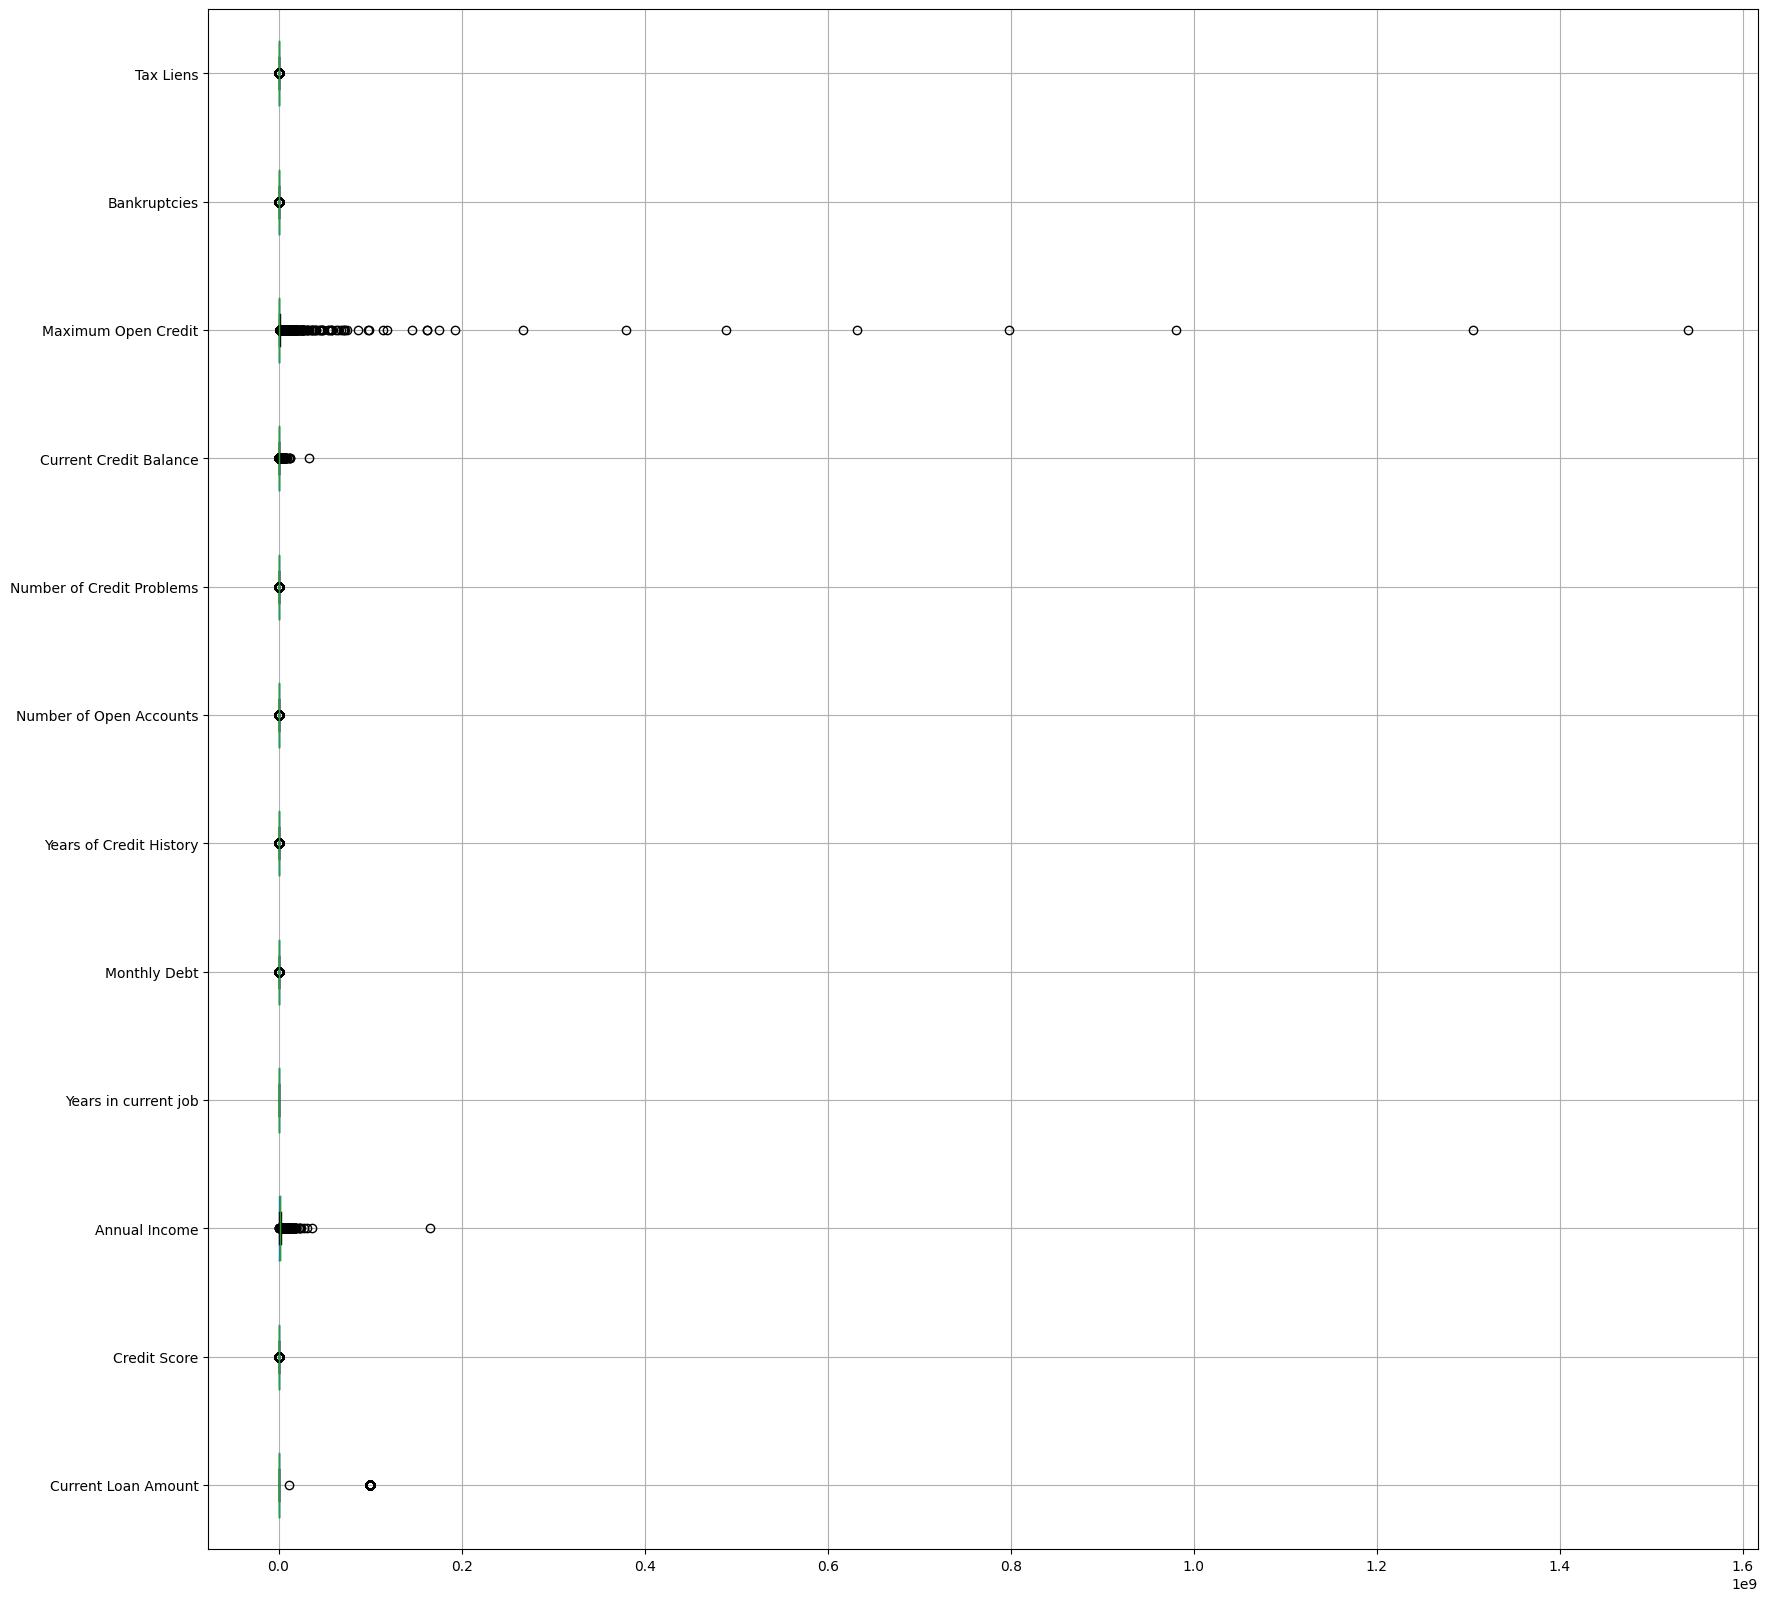

In [ ]:
# After removing outlier

print(dict(check_outlier(X).sum()))
print("Boxplot New")
X.boxplot(vert=False, figsize=(20,20))

#### Encoding Functions

In [ ]:
# Function for label encoding

def label_encode_columns(data, columns):
    label_encoder = LabelEncoder()
    for col in columns:
        data[col] = label_encoder.fit_transform(data[col])

In [ ]:
# Function for One hot encoding
def one_hot_encode_columns(data, columns):
    return pd.get_dummies(data, columns=columns)

#### Pre-Analysis  

In [ ]:
# Code just to check all the value on a column

check = df.groupby("Number of Open Accounts")
check.describe()

Current Loan Amount                              \
                                      count          mean           std   
Number of Open Accounts                                                   
0.00000                                 2.0  3.171850e+05  3.254544e+05   
1.00000                                22.0  1.381897e+07  3.505110e+07   
2.00000                               380.0  1.330970e+07  3.378892e+07   
3.00000                              1133.0  1.173635e+07  3.192856e+07   
4.00000                              2423.0  1.385846e+07  3.427203e+07   
5.00000                              4026.0  1.314891e+07  3.348948e+07   
6.00000                              5737.0  1.262572e+07  3.286624e+07   
7.00000                              6942.0  1.332235e+07  3.362664e+07   
8.00000                              7507.0  1.377001e+07  3.409855e+07   
9.00000                              8025.0  1.264527e+07  3.284759e+07   
10.00000                             7706.0  1.296228e+07  3.318698e+07   
11.00000                             7303.0  1.313956e+07  3.336762e+07   
11.12853                                1.0  1.176045e+07           NaN   
12.00000                             6422.0  1.283952e+07  3.302276e+07   
13.00000                             5359.0  1.296638e+07  3.315474e+07   
14.00000                             4432.0  1.286608e+07  3.303955e+07   
15.00000                             3634.0  1.375682e+07  3.401218e+07   
16.00000                             2987.0  1.190298e+07  3.189297e+07   
17.00000                             2414.0  1.303052e+07  3.320473e+07   
18.00000                             1874.0  1.397093e+07  3.422927e+07   
19.00000                             1595.0  1.309847e+07  3.329059e+07   
20.00000                             1221.0  1.292612e+07  3.309410e+07   
21.00000                              950.0  1.232888e+07  3.239228e+07   
22.00000                              708.0  1.220482e+07  3.223531e+07   
23.00000                              573.0  1.462492e+07  3.492065e+07   
24.00000                              468.0  1.442713e+07  3.471086e+07   
25.00000                              351.0  1.398508e+07  3.428459e+07   
26.00000                              221.0  1.118827e+07  3.106963e+07   
27.00000                              224.0  1.282777e+07  3.302235e+07   
28.00000                              143.0  1.501124e+07  3.538516e+07   
29.00000                              105.0  1.744807e+07  3.773004e+07   
30.00000                               89.0  1.158547e+07  3.163537e+07   
31.00000                               64.0  1.907438e+07  3.918310e+07   
32.00000                               60.0  2.360620e+07  4.250074e+07   
33.00000                               46.0  1.551956e+07  3.618676e+07   
34.00000                               37.0  2.189667e+07  4.158803e+07   
35.00000                               18.0  1.158746e+07  3.216523e+07   
36.00000                               22.0  9.532126e+06  2.928264e+07   
37.00000                               14.0  7.454464e+06  2.663692e+07   
38.00000                               11.0  9.460327e+06  3.002950e+07   
39.00000                                7.0  3.791260e+05  2.654844e+05   
40.00000                                6.0  2.177780e+05  9.122463e+04   
41.00000                                5.0  4.476824e+05  1.553116e+05   
42.00000                                4.0  2.536070e+07  4.975998e+07   
43.00000                                7.0  2.897557e+07  4.851910e+07   
44.00000                                3.0  2.574073e+05  2.032981e+05   
45.00000                                5.0  2.015669e+07  4.463394e+07   
47.00000                                3.0  3.355126e+07  5.754633e+07   
48.00000                                2.0  4.461600e+05  2.215224e+04   
52.00000                                2.0  1.311090e+05  3.811306e+03   
56.00000                                2.0  5.02

Buatlah beberapa model yang mungkin akan diperlukan, di antaranya: (dapat ditambah analisis lain yang
menurut kelompok Anda akan bermanfaat)


#### Metrics to evaluate regression/classification

In [ ]:
# https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-models-c91c65d73af
def regression_metrics(prediction, y_test):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

In [ ]:
def classification_metrics(prediction, y_test):
  accuracy = accuracy_score(y_test, prediction)
  f1 = f1_score(y_test, prediction, average="macro")
  recall = recall_score(y_test, prediction, average="macro")
  precision = precision_score(y_test, prediction, average="macro")

  print('Accuracy: ' + str(accuracy))
  print('F1 Score: ' + str(f1))
  print('Recall Score: ' + str(recall))
  print('Precision Score: ' + str(precision))

#### Model RF untuk Loan Status

a. Buatlah model untuk mengklasifikasi ‘Loan Status’. Atribut apa saja yang perlu diperhatikan ketika
ingin menentukan 'Loan Status' customer?

In [ ]:
label_encode_columns(X, columns_to_encode)

X = one_hot_encode_columns(X, columns_to_one_hot_encode)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Normalize & Standarization

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()

X_train_scaled_normalize = scaler.fit_transform(X_train)
X_test_scaled_normalize = scaler.transform(X_test)

scaler = StandardScaler()

X_train_scaled_standaridize = scaler.fit_transform(X_train)
X_test_scaled_standaridize = scaler.transform(X_test)

In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)

# param_grid = {'criterion': ["gini", "entropy", "log_loss"],
#                'min_samples_split': [10, 20, 50],
#                'max_depth' : [5, 10, 12, 16, 18]}

# clf_rf_classifier = GridSearchCV(estimator= rf_classifier,
#                    param_grid=param_grid, cv= 5)
# print(clf_rf_classifier.best_params_)

rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### Feature Importance (which attribute matters)

                         Feature  Importance
29      Purpose_renewable_energy    0.000086
13   Home Ownership_HaveMortgage    0.000216
21  Purpose_Educational Expenses    0.000272
31              Purpose_vacation    0.000387
32               Purpose_wedding    0.000428
27                Purpose_moving    0.000470
25           Purpose_Take a Trip    0.000847
26        Purpose_major_purchase    0.000930
18             Purpose_Buy House    0.001276
30        Purpose_small_business    0.001414
19             Purpose_Buy a Car    0.001421
23         Purpose_Medical Bills    0.001956
17         Purpose_Business Loan    0.002672
24                 Purpose_Other    0.002794
12                     Tax Liens    0.003282
15       Home Ownership_Own Home    0.003954
22     Purpose_Home Improvements    0.004012
14  Home Ownership_Home Mortgage    0.004493
16           Home Ownership_Rent    0.004785
28                 Purpose_other    0.004861
11                  Bankruptcies    0.007116
20    Purp

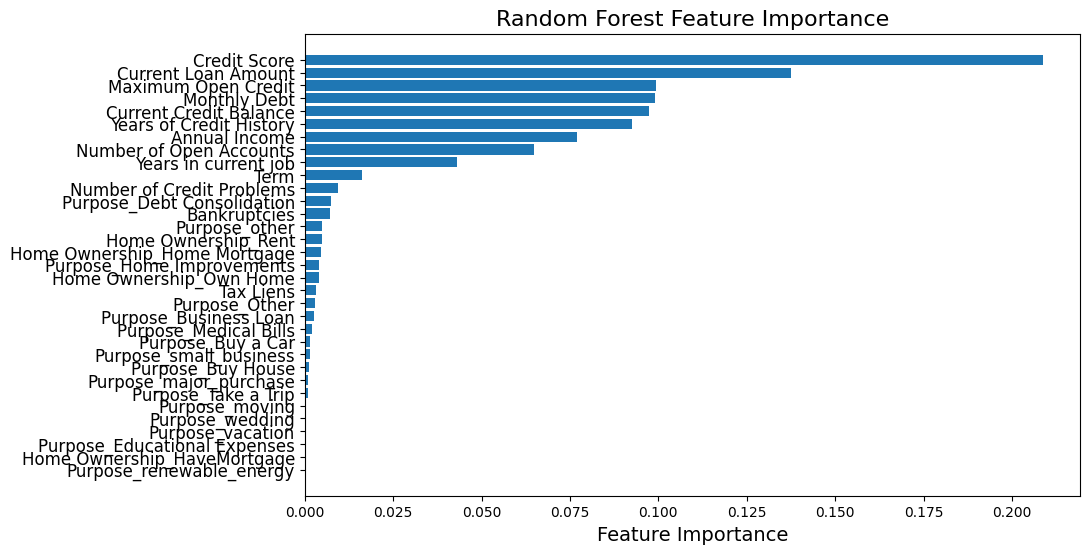

In [ ]:
feature_importances = rf_classifier.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

print(feature_importance_df)
# Plotting
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance_df)), feature_importance_df['Importance'], align='center')
plt.yticks(range(len(feature_importance_df)), feature_importance_df['Feature'], fontsize=12)
plt.xlabel('Feature Importance', fontsize=14)
plt.title('Random Forest Feature Importance', fontsize=16)
plt.show()

#### RF Prediction for Loan Status

In [ ]:
# Prediction for "Loan Status"

# Note: welp apparently its true that RF is not sensitive to outlier, so doesnt matter that much.
# Another note: feature scaling nor normalization is not really needed based on several inputs: https://forecastegy.com/posts/does-random-forest-need-feature-scaling-or-normalization/
predicted = rf_classifier.predict(X_test)
classification_metrics(predicted, y_test)

# with normalization (for now i wont put it in, because its not needed right ??)
# Accuracy: 0.7951348182883939
# F1 Score: 0.623914975051892
# Recall Score: 0.6109268546689336
# Precision Score: 0.8134998895788074

Accuracy: 0.7972450175849941
F1 Score: 0.6287584115789173
Recall Score: 0.6144057687034539
Precision Score: 0.8190312696621196


#### Model KNN



##### Reading Dataset Again

In [ ]:
df =pd.read_csv("customer_credit_loan_train.csv")

df.head()

# Size of DF

rows, columns = df.shape
print("Banyaknya baris pada dataset: ", rows)
print("Banyaknya kolom pada dataset: ", columns)

Banyaknya baris pada dataset:  85296
Banyaknya kolom pada dataset:  18


##### Encoding related

In [ ]:
X = df.drop(["Loan Status", "Loan ID", "Customer ID"], axis=1)

y = df["Loan Status"]

label_encode_columns(X, columns_to_encode)

X = one_hot_encode_columns(X, columns_to_one_hot_encode)

X["Years in current job"] = X["Years in current job"].apply(lambda x: int(''.join(filter(str.isdigit, str(x)))))

remove_outlier(X, "iqr")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y,random_state = 123)

Outlier pada tiap atribut:
Current Loan Amount             10928
Term                                0
Credit Score                     4321
Annual Income                    6056
Years in current job                0
Monthly Debt                     2860
Years of Credit History          2654
Number of Open Accounts          1920
Number of Credit Problems       11709
Current Credit Balance           4427
Maximum Open Credit              4939
Bankruptcies                     9417
Tax Liens                        1612
Home Ownership_HaveMortgage       176
Home Ownership_Home Mortgage        0
Home Ownership_Own Home          7773
Home Ownership_Rent                 0
Purpose_Business Loan            1290
Purpose_Buy House                 557
Purpose_Buy a Car                1101
Purpose_Debt Consolidation      17997
Purpose_Educational Expenses       89
Purpose_Home Improvements        4981
Purpose_Medical Bills             933
Purpose_Other                    2742
Purpose_Take a Trip    

##### Standarization

In [ ]:
scaler = StandardScaler()

In [ ]:
def scale(data):
  return scaler.fit_transform(data)

X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [ ]:
# Classifer Performance

from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score


def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print("Butuh informasi lebih lengkap? silakan simak di bawah ini : ")
    print('Accuracy Average:', accuracy_score(y_test, prediction))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

##### KNN Hyperparameter Tuning

In [ ]:
# Dont have to run, i have tried it, takes so long to finish

# # Will use hyperparameter tuning here
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import KFold, cross_val_score

# kfold = KFold(n_splits=4, shuffle=True, random_state=42)

# model = KNeighborsClassifier()
# cols = X.shape[1]
# tunned_params = [{'n_neighbors': [i for i in range(1, cols + 1)], 'metric': ["euclidean"]}]
# #tunned_params_edu = [{'n_neighbors': [i for i in range(1, cols + 1)],'metric': ["euclidean", "manhattan", "minkowski", "chebyshev"]}] -> this takes so long lmao

# print("Tuning hyper-parameters model KNN Edu")
# print()

# clfKNN = GridSearchCV(
#     model,
#     tunned_params,
#     scoring="accuracy",
#     cv=kfold,
#     verbose = 2
# )

# clfKNN.fit(X_train_scaled, y_train)

# # scores = cross_val_score(clfKNN, X_train_scaled, y_train, scoring='accuracy', cv=kfold)
# # print(f'Hasil Evaluasi cross validation dengan metric distance {clfKNN.best_params_["metric"]}: {scores.mean()}')

# print()
# print("Best parameters set found on development set:")
# print(clfKNN.best_params_)
# print()
# print("Detailed classification report:")
# y_true, y_pred = y_test, clfKNN.predict(X_test_scaled)
# evaluate_classifier_performance(y_pred, y_true)
# print()

Here is the result (automatic saving failed :) )

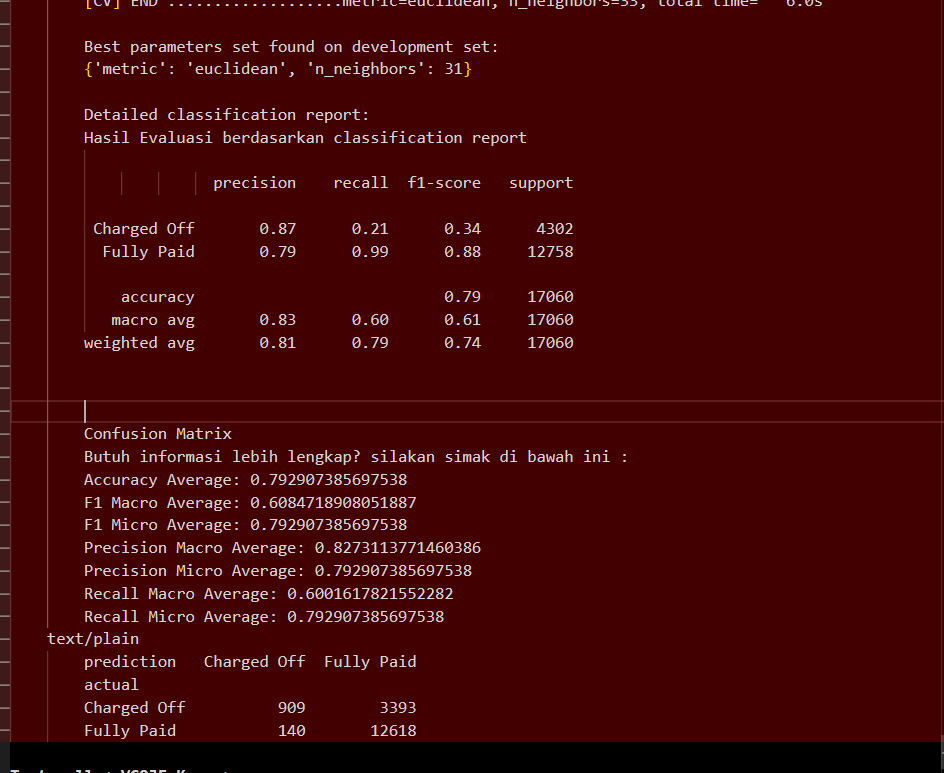

# Soal B no 2
b. Buatlah model untuk memprediksi ‘Maximum Open Credit’ customer. Bagaimana hasil prediksi anda dapat membantu menentukan credit maksimal yang dapat dibuka oleh customer?

In [ ]:
df =pd.read_csv("customer_credit_loan_train.csv")

df.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status
0,e72a2f0d-1db6-475d-a19b-ef1b4cd41526,1dcd12f3-dcd2-47de-b013-2f83a47c4da3,344036.0,Short Term,738.0,2785590.0,10+ years,Home Mortgage,Debt Consolidation,32962.91,20.2,10.0,1.0,142329.0,184976.0,1.0,0.0,Fully Paid
1,001cc33b-b2b7-4015-860e-b8a264f3c8e8,e7547780-1896-4bf6-933b-103e0a60b8df,111540.0,Short Term,746.0,1708898.0,10+ years,Home Mortgage,Buy House,20221.89,16.9,11.0,0.0,357295.0,510752.0,0.0,0.0,Fully Paid
2,91547ea7-985c-4657-8768-3839c22ea2fa,95580534-3835-482b-838d-19a7332ae943,556952.0,Long Term,671.0,1503128.0,< 1 year,Own Home,Debt Consolidation,15156.68,14.0,4.0,0.0,66367.0,84810.0,0.0,0.0,Fully Paid
3,ca4789c7-8880-467e-b3db-11166bdede4d,8bb4ec48-61f2-4420-b248-88bb03aeefb2,753302.0,Long Term,700.0,1821587.0,7 years,Home Mortgage,Debt Consolidation,16546.15,17.3,12.0,0.0,478648.0,1045726.0,0.0,0.0,Fully Paid
4,8c09e637-df32-4ab6-a16e-1c7ccc0a0d82,0d95ab08-2697-41fa-a43a-1f9cb94bfbc0,754754.0,Long Term,678.0,2029998.0,10+ years,Home Mortgage,Debt Consolidation,37723.93,17.3,21.0,0.0,1115699.0,2028048.0,0.0,0.0,Fully Paid


In [ ]:
# Size of DF

rows, columns = df.shape
print("Banyaknya baris pada dataset: ", rows)
print("Banyaknya kolom pada dataset: ", columns)

Banyaknya baris pada dataset:  85296
Banyaknya kolom pada dataset:  18


## Preprocess data again

Tidak ditemukan missing value pada dataset
Duplicates value on dataset: 0
Outlier pada tiap atribut:
Annual Income                 6056
Bankruptcies                  9417
Credit Score                  4321
Current Credit Balance        4427
Current Loan Amount          10928
Home Ownership                   0
Loan Status                      0
Maximum Open Credit           4939
Monthly Debt                  2860
Number of Credit Problems    11709
Number of Open Accounts       1920
Purpose                          0
Tax Liens                     1612
Term                             0
Years in current job             0
Years of Credit History       2654
dtype: int64
{'Annual Income': 6056, 'Bankruptcies': 9417, 'Credit Score': 4321, 'Current Credit Balance': 4427, 'Current Loan Amount': 10928, 'Home Ownership': 0, 'Loan Status': 0, 'Maximum Open Credit': 4939, 'Monthly Debt': 2860, 'Number of Credit Problems': 11709, 'Number of Open Accounts': 1920, 'Purpose': 0, 'Tax Liens': 1612, 'Ter

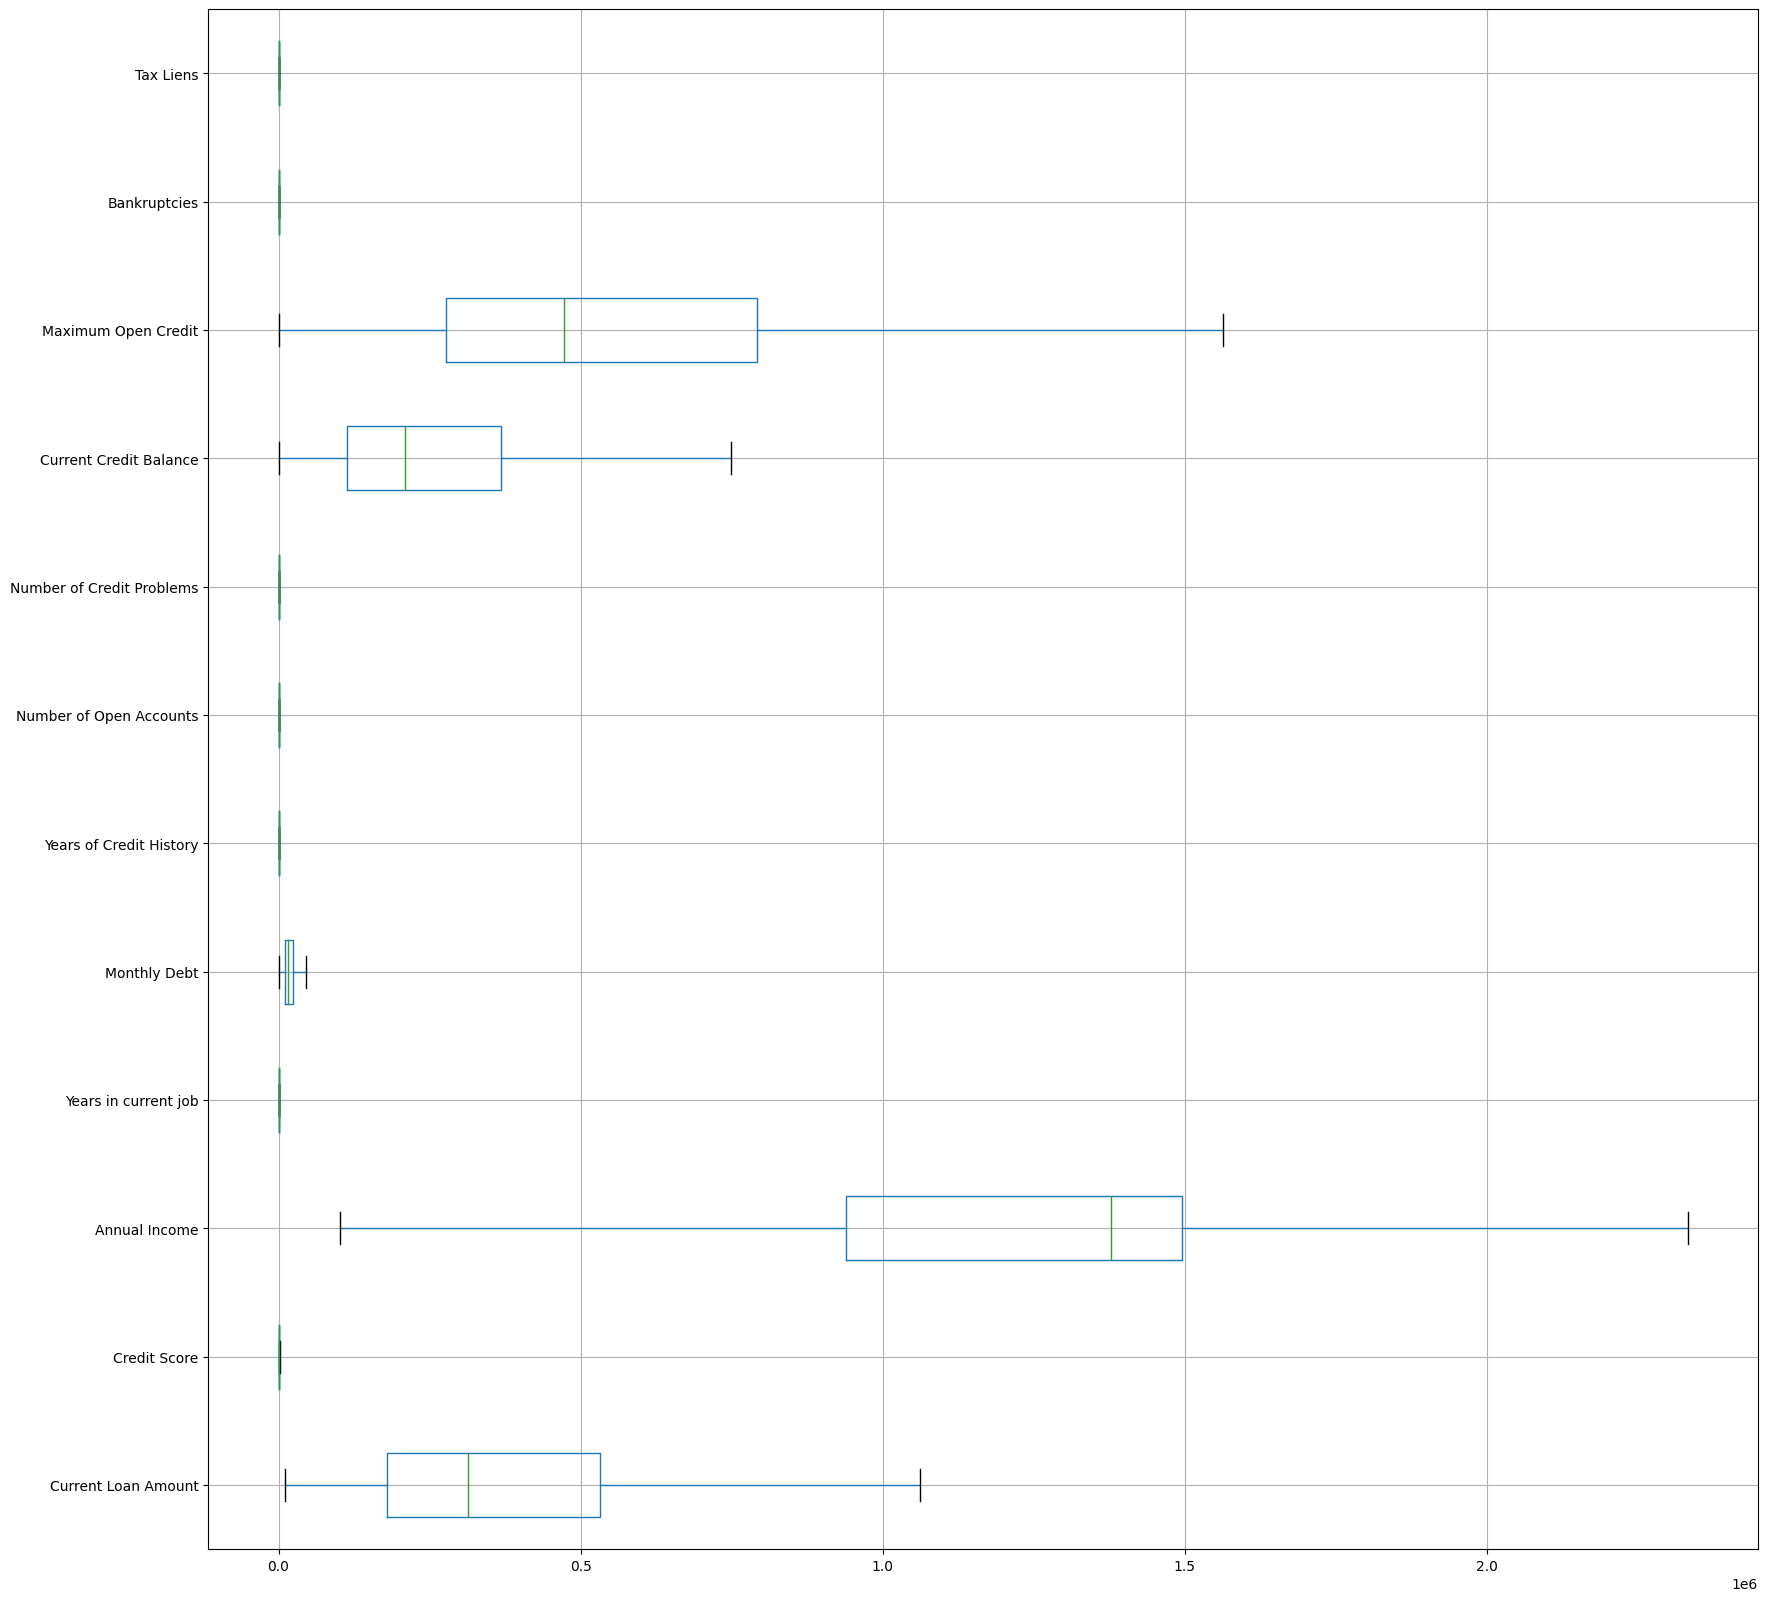

In [ ]:
df.drop(["Loan ID", "Customer ID"], axis=1, inplace=True)
df["Years in current job"] = df["Years in current job"].apply(lambda x: int(''.join(filter(str.isdigit, str(x)))))

preprocess(df)

columns_to_encode = [
    "Term",
    "Loan Status"
]

columns_to_one_hot_encode = [
    "Home Ownership",
    "Purpose"
]
remove_outlier(df, 'iqr')

df.boxplot(vert=False, figsize=(20,20))
# Label encoding
X = df.drop(["Maximum Open Credit"], axis=1)

y = df["Maximum Open Credit"]


label_encode_columns(X, columns_to_encode)

X = one_hot_encode_columns(X, columns_to_one_hot_encode)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Normalize Data

Doenst have to

In [ ]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler

# scaler = MinMaxScaler()

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [ ]:
# from sklearn.linear_model import SGDRegressor
# rf_regressor = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.01, random_state=42)
rf_regressor = RandomForestRegressor(random_state=42)

rf_regressor.fit(X_train, y_train)

# Really bad result inc
predicted = rf_regressor.predict(X_test)

regression_metrics(predicted, y_test)

MAE: 152581.2689458523
MSE: 46476761655.07667
RMSE: 215584.697172774
R_squared: 0.7162220138703458


c. Lakukan analisis cluster yang dapat terbentuk pada data yang tersedia. Deskripsikan karakteristik masing-masing cluster